In [1]:
import json
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict
import pandas as pd

In [4]:
# First time building the graph
data = pd.read_csv('data.csv')
data.head()

,text,industry,related_to,related_industry
0,benefits board benefits board homejoin plannin...,marketing and advertising,419576,investment management
1,home columbia landcare environmental stewardsh...,environmental services,1161311,facilities services
2,region inc worldwide revenue accelerating worl...,management consulting,784108,hospital & health care
3,home team careers services civil design case s...,civil engineering,969156,marketing and advertising
4,home friedman associates friedman associates c...,accounting,509477,accounting


In [5]:
edges = data[['industry', 'related_industry']].value_counts().to_dict()
with open('industry_map_edges.txt', 'w') as f:
    for edge, w in edges.items():
        f.write(f'{edge[0]}\t{edge[1]}\t{w}\n')
edges

{('construction', 'construction'): 37970,
 ('real estate', 'real estate'): 25354,
 ('marketing and advertising', 'marketing and advertising'): 22271,
 ('information technology and services',
  'information technology and services'): 17355,
 ('law practice', 'law practice'): 16318,
 ('financial services', 'financial services'): 16160,
 ('insurance', 'insurance'): 15963,
 ('hospital & health care', 'hospital & health care'): 14436,
 ('health, wellness and fitness', 'health, wellness and fitness'): 13778,
 ('automotive', 'automotive'): 10468,
 ('accounting', 'accounting'): 8810,
 ('religious institutions', 'religious institutions'): 8682,
 ('medical practice', 'medical practice'): 8601,
 ('non-profit organization management',
  'non-profit organization management'): 8050,
 ('computer software', 'information technology and services'): 6165,
 ('staffing and recruiting', 'staffing and recruiting'): 6068,
 ('medical practice', 'hospital & health care'): 5623,
 ('computer software', 'computer 

In [2]:
# Loading the graph if industry_map_edges.txt exists
edges = {}
with open('industry_map_edges.txt', 'r') as f:
    for line in f.readlines():
        _line = line.strip().split('\t')
        edges[(_line[0], _line[1])] = int(_line[2])
edges

{('construction', 'construction'): 37970,
 ('real estate', 'real estate'): 25354,
 ('marketing and advertising', 'marketing and advertising'): 22271,
 ('information technology and services',
  'information technology and services'): 17355,
 ('law practice', 'law practice'): 16318,
 ('financial services', 'financial services'): 16160,
 ('insurance', 'insurance'): 15963,
 ('hospital & health care', 'hospital & health care'): 14436,
 ('health, wellness and fitness', 'health, wellness and fitness'): 13778,
 ('automotive', 'automotive'): 10468,
 ('accounting', 'accounting'): 8810,
 ('religious institutions', 'religious institutions'): 8682,
 ('medical practice', 'medical practice'): 8601,
 ('non-profit organization management',
  'non-profit organization management'): 8050,
 ('computer software', 'information technology and services'): 6165,
 ('staffing and recruiting', 'staffing and recruiting'): 6068,
 ('medical practice', 'hospital & health care'): 5623,
 ('computer software', 'computer 

In [3]:
graph = nx.Graph()

for edge, w in edges.items():
    graph.add_edge(edge[0], edge[1], weight=w)

print(len(graph.nodes))
graph.nodes

147


NodeView(('construction', 'real estate', 'marketing and advertising', 'information technology and services', 'law practice', 'financial services', 'insurance', 'hospital & health care', 'health, wellness and fitness', 'automotive', 'accounting', 'religious institutions', 'medical practice', 'non-profit organization management', 'computer software', 'staffing and recruiting', 'retail', 'education management', 'transportation/trucking/railroad', 'food & beverages', 'hospitality', 'management consulting', 'legal services', 'oil & energy', 'restaurants', 'veterinary', 'sports', 'architecture & planning', 'mental health care', 'environmental services', 'banking', 'printing', 'consumer services', 'internet', 'music', 'events services', 'telecommunications', 'entertainment', 'civil engineering', 'design', 'security and investigations', 'apparel & fashion', 'photography', 'electrical/electronic manufacturing', 'machinery', 'leisure, travel & tourism', 'building materials', 'investment manageme

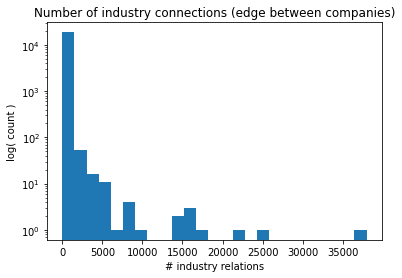

In [5]:
weights = edges.values()
plt.figure()
plt.title('Number of industry connections (edge between companies)')
plt.ylabel('log( count )')
plt.xlabel('# industry relations')
plt.hist(weights, bins=25)
plt.yscale('log')
plt.show()

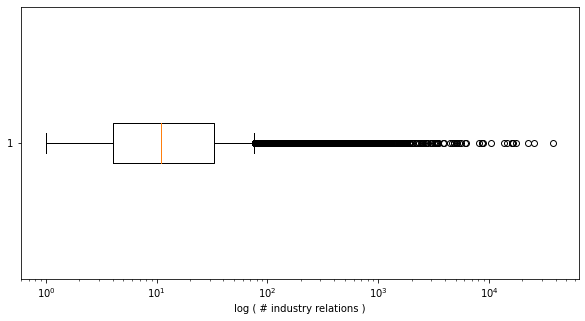

In [6]:
plt.figure(figsize=(10,5))
plt.boxplot(weights, vert=False)
plt.xlabel('log ( # industry relations )')
plt.xscale('log')
plt.show()

In [7]:
num_connected_components = len(list(nx.connected_components(graph)))
print('Number of connected components:', num_connected_components)

num_nodes = graph.number_of_nodes()
print('Number of nodes:', num_nodes)

num_edges = graph.number_of_edges()
print('Number of edges:', num_edges)

mean_degree = np.mean([d for n,d in graph.degree()])
print('Mean node degree:', mean_degree)

Number of connected components: 1
Number of nodes: 147
Number of edges: 10010
Mean node degree: 136.1904761904762


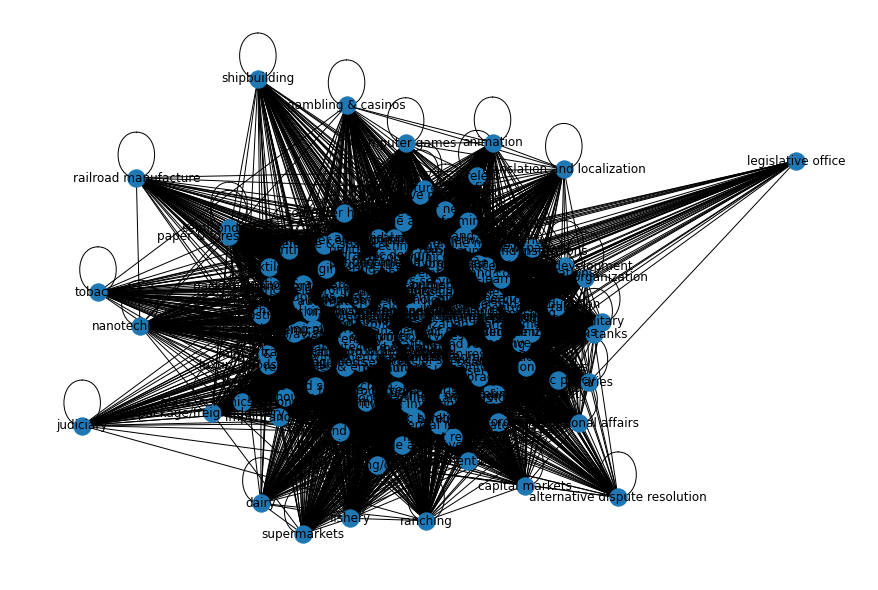

In [19]:
plt.figure(figsize=(12,8))
nx.draw(graph, with_labels=True)
plt.savefig('raw_industry_map.png')

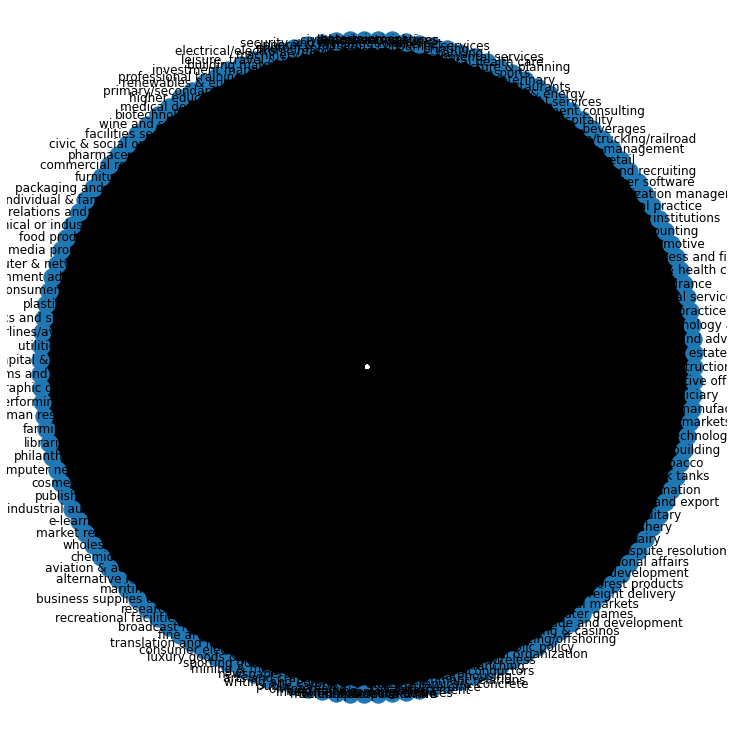

In [27]:
plt.figure(figsize=(10,10))
nx.draw_circular(graph, with_labels=True)

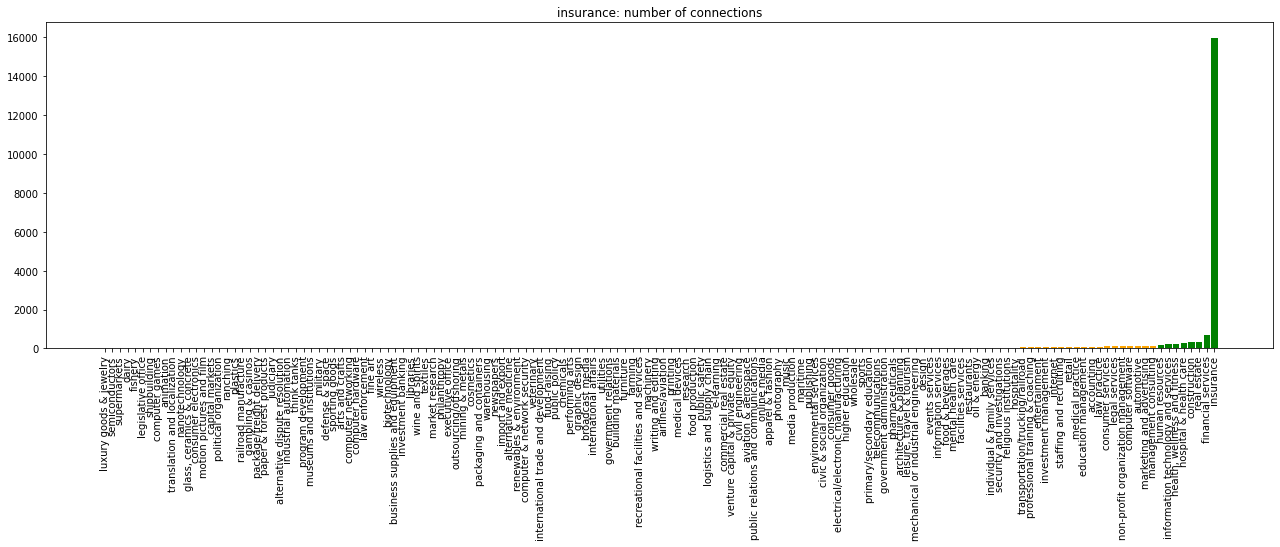

In [20]:
n = 'insurance'
w = []
for neighbor in graph[n]:
    w.append((neighbor, graph[n][neighbor]['weight']))

w = sorted(w, key=lambda x:x[1])

N = [x[0] for x in w]
W = [x[1] for x in w]
t = np.quantile(W, 0.95)
C = []
for x in W:
    if x > t:
        C.append('green')
    else:
        C.append('orange')

plt.figure(figsize=(22,6))
plt.title(f'{n}: number of connections')
plt.bar(N, W, color=C)
plt.xticks(rotation=90)
plt.show()

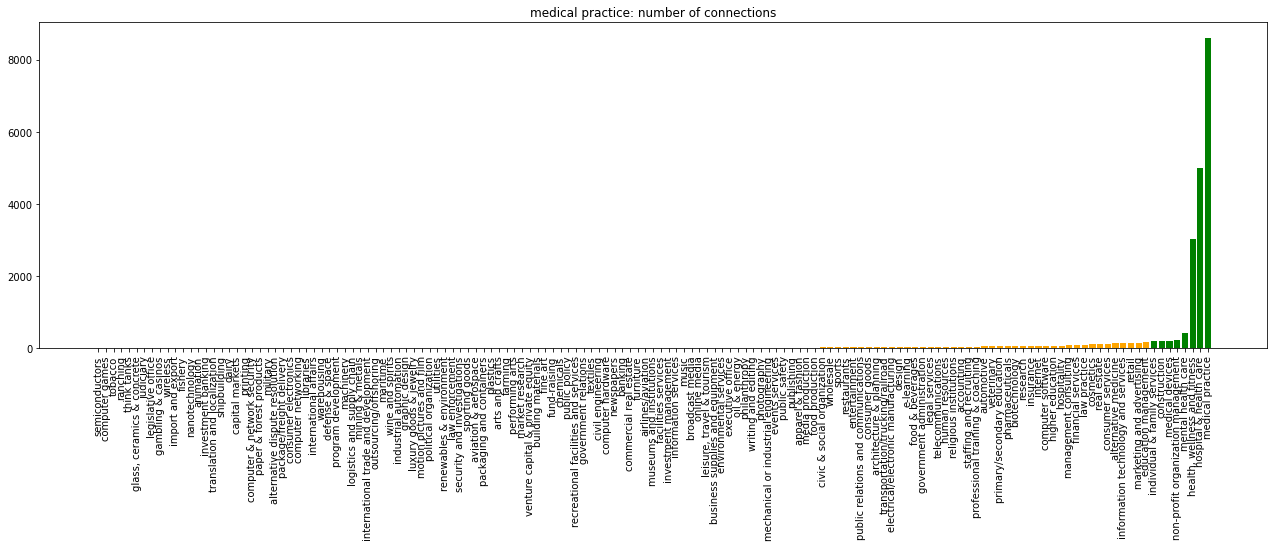

In [49]:
n = 'medical practice'
w = []
for neighbor in graph[n]:
    w.append((neighbor, graph[n][neighbor]['weight']))

w = sorted(w, key=lambda x:x[1])

N = [x[0] for x in w]
W = [x[1] for x in w]
t = np.quantile(W, 0.95)
C = []
for x in W:
    if x > t:
        C.append('green')
    else:
        C.append('orange')

plt.figure(figsize=(22,6))
plt.title(f'{n}: number of connections')
plt.bar(N, W, color=C)
plt.xticks(rotation=90)
plt.show()

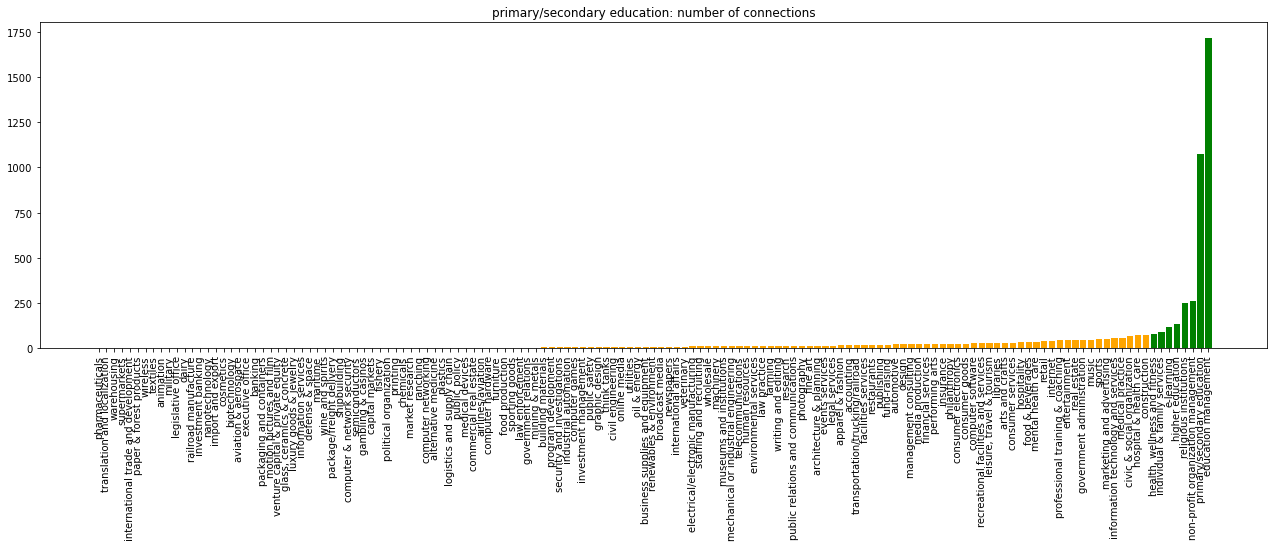

In [30]:
n = list(graph.nodes)[50]
w = []
for neighbor in graph[n]:
    w.append((neighbor, graph[n][neighbor]['weight']))

w = sorted(w, key=lambda x:x[1])

N = [x[0] for x in w]
W = [x[1] for x in w]
t = np.quantile(W, 0.95)
C = []
for x in W:
    if x > t:
        C.append('green')
    else:
        C.append('orange')

plt.figure(figsize=(22,6))
plt.title(f'{n}: number of connections')
plt.bar(N, W, color=C)
plt.xticks(rotation=90)
plt.show()

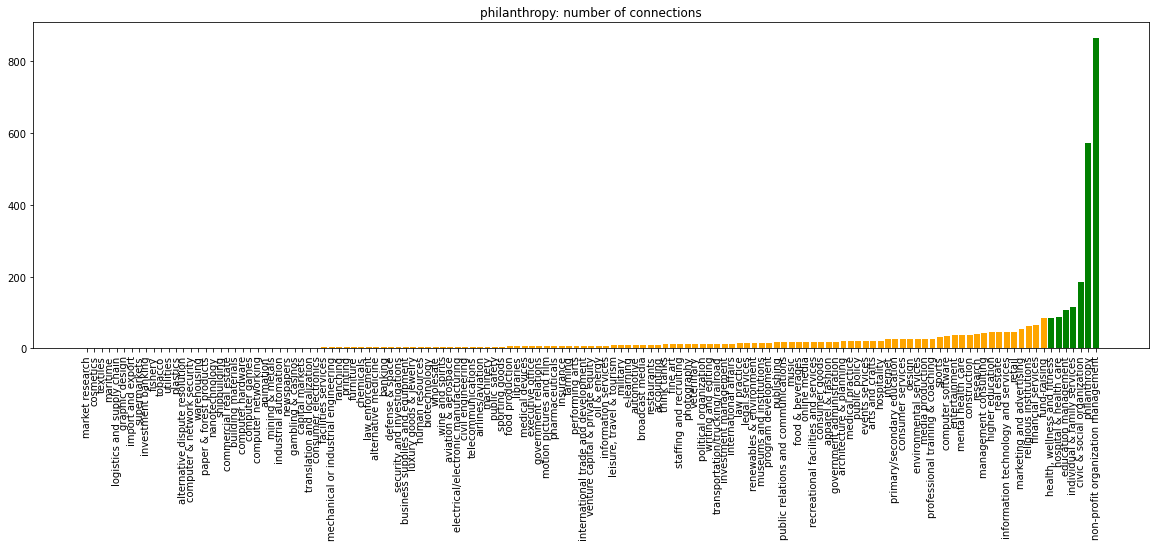

In [31]:
n = list(graph.nodes)[80]
w = []
for neighbor in graph[n]:
    w.append((neighbor, graph[n][neighbor]['weight']))

w = sorted(w, key=lambda x:x[1])

N = [x[0] for x in w]
W = [x[1] for x in w]
t = np.quantile(W, 0.95)
C = []
for x in W:
    if x > t:
        C.append('green')
    else:
        C.append('orange')

plt.figure(figsize=(20,6))
plt.title(f'{n}: number of connections')
plt.bar(N, W, color=C)
plt.xticks(rotation=90)
plt.show()

In [26]:
industry_diagraph = nx.DiGraph()
for u in graph:
    neighbors = {v:graph[u][v]['weight'] for v in graph.neighbors(u)}
    threshold = np.quantile(list(neighbors.values()), 0.95)
    for v,w in neighbors.items():
        if w > threshold:
            industry_diagraph.add_edge(u,v,weight=w)
industry_diagraph.remove_edges_from(nx.selfloop_edges(industry_diagraph))


In [55]:
num_strongly_connected_components = nx.number_strongly_connected_components(industry_diagraph)
print('Number of strongly connected components:', num_strongly_connected_components)

num_weakly_connected_components = nx.number_weakly_connected_components(industry_diagraph)
print('Number of weakly connected components:', num_weakly_connected_components)

num_nodes = industry_diagraph.number_of_nodes()
print('Number of nodes:', num_nodes)

num_edges = industry_diagraph.number_of_edges()
print('Number of edges:', num_edges)

mean_degree = np.mean([d for n,d in industry_diagraph.degree()])
print('Mean node degree:', mean_degree)

Number of strongly connected components: 47
Number of weakly connected components: 1
Number of nodes: 147
Number of edges: 914
Mean node degree: 12.435374149659864


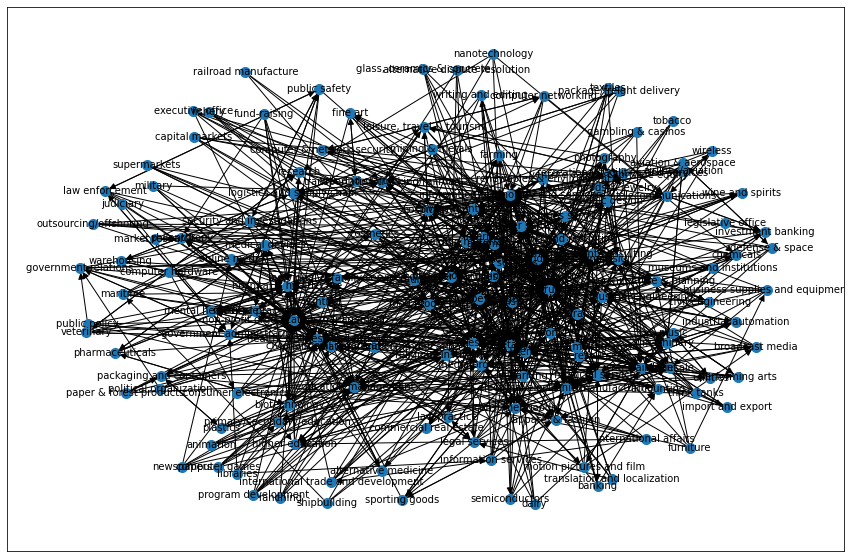

In [53]:
plt.figure(figsize=(15,10))
pos = nx.spring_layout(industry_diagraph, k=5)
nx.draw_networkx(industry_diagraph, pos=pos, node_size=100, font_size=10, arrowsize=13)
plt.savefig('diagraph.png')

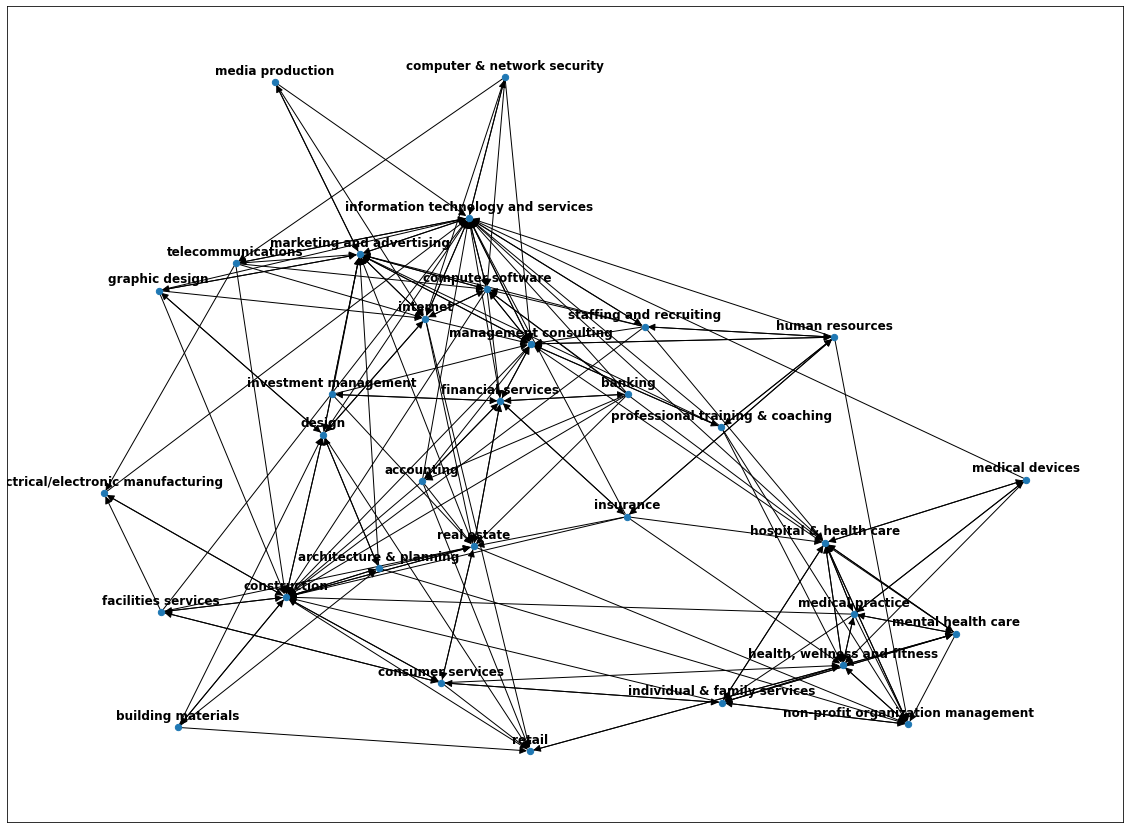

In [39]:
subgraph_nodes = []
subgraph_nodes.extend(industry_diagraph.neighbors('computer software'))
for n in subgraph_nodes.copy():
    subgraph_nodes.extend(industry_diagraph.neighbors(n))
subgraph = industry_diagraph.subgraph(subgraph_nodes)
plt.figure(figsize=(20,15), frameon=False)
pos = nx.spring_layout(subgraph, seed=13)
nx.draw_networkx(subgraph, pos=pos, node_size=40, arrowsize=15, with_labels=False)
pos_labels = {x:(y[0], y[1]+0.03) for x,y in pos.items()}
nx.draw_networkx_labels(subgraph, pos=pos_labels, font_size=12, font_weight='bold')
plt.savefig('computer_software_subnet.png')

['construction', 'consumer services', 'health, wellness and fitness', 'medical practice']


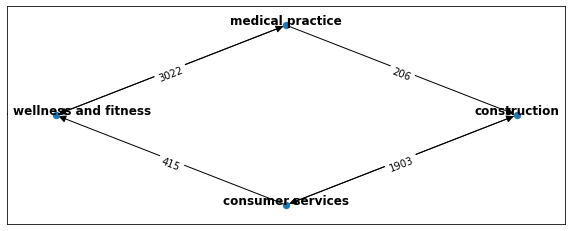

In [48]:
path1 = nx.shortest_path(industry_diagraph, 'construction', 'medical practice')
print(path1)
subgraph = industry_diagraph.subgraph(path1)
plt.figure(figsize=(10,4))
pos = nx.circular_layout(subgraph)
nx.draw_networkx(subgraph, pos=pos, node_size=40, arrowsize=15, with_labels=False)
pos_labels = {x:(y[0], y[1]+0.05) for x,y in pos.items()}
nx.draw_networkx_labels(subgraph, pos=pos_labels, font_size=12, font_weight='bold')
weight_labels = nx.get_edge_attributes(subgraph,'weight')
pos_weights = {x:(y[0], y[1]-0.04) for x,y in pos.items()}
nx.draw_networkx_edge_labels(subgraph, pos_weights, edge_labels=weight_labels)
plt.show()

In [52]:
nx.number_strongly_connected_components(industry_diagraph)

47

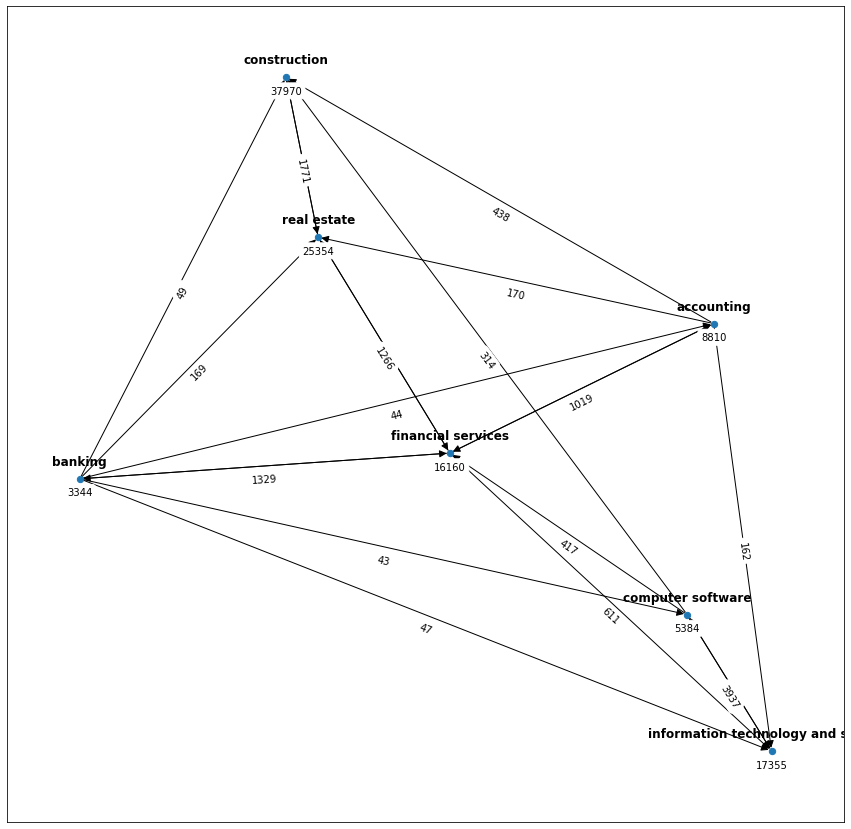

In [58]:
subgraph_nodes = []
subgraph_nodes.extend(industry_diagraph.successors('banking'))
subgraph_nodes.extend(industry_diagraph.predecessors('banking'))
# for n in subgraph_nodes.copy():
#     subgraph_nodes.extend(industry_diagraph.neighbors(n))
subgraph = industry_diagraph.subgraph(subgraph_nodes)
plt.figure(figsize=(15,15))
pos = nx.spring_layout(subgraph, seed=12)
nx.draw_networkx(subgraph, pos=pos, node_size=40, arrowsize=15, with_labels=False)
pos_labels = {x:(y[0], y[1]+0.05) for x,y in pos.items()}
nx.draw_networkx_labels(subgraph, pos=pos_labels, font_size=12, font_weight='bold')
weight_labels = nx.get_edge_attributes(subgraph,'weight')
pos_weights = {x:(y[0], y[1]-0.04) for x,y in pos.items()}
nx.draw_networkx_edge_labels(subgraph, pos_weights, edge_labels=weight_labels)
plt.show()

In [65]:
# Normalizing weights
for u in industry_diagraph:
    neighbors = {v:industry_diagraph[u][v]['weight'] for v in industry_diagraph.neighbors(u)}
    weight_sum = sum(neighbors.values())
    for v in neighbors:
        industry_diagraph[u][v]['weight'] = round(industry_diagraph[u][v]['weight'] / weight_sum, 2)

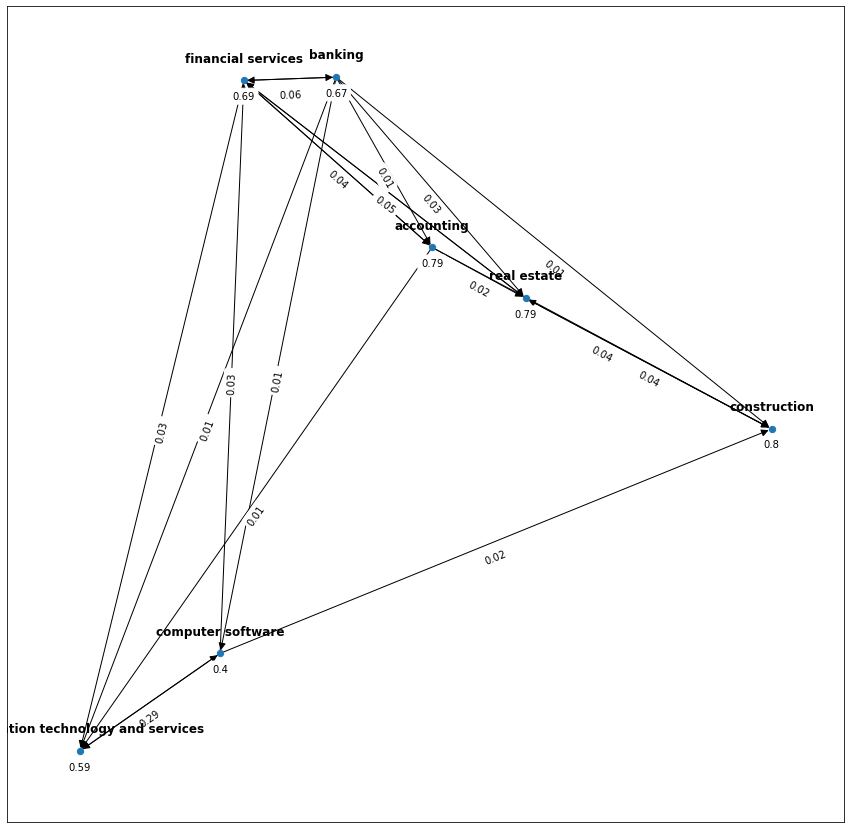

In [79]:
topic = 'banking'
subgraph_nodes = []
subgraph_nodes.extend(industry_diagraph.successors(topic))
subgraph_nodes.extend(industry_diagraph.predecessors(topic))
subgraph = industry_diagraph.subgraph(subgraph_nodes)
plt.figure(figsize=(15,15))
pos = nx.spring_layout(subgraph, seed=12)
nx.draw_networkx(subgraph, pos=pos, node_size=40, arrowsize=15, with_labels=False)
pos_labels = {x:(y[0], y[1]+0.02) for x,y in pos.items()}
nx.draw_networkx_labels(subgraph, pos=pos_labels, font_size=12, font_weight='bold', verticalalignment='bottom', )
weight_labels = nx.get_edge_attributes(subgraph,'weight')
pos_weights = {x:(y[0], y[1]-0.02) for x,y in pos.items()}
nx.draw_networkx_edge_labels(subgraph, pos_weights, edge_labels=weight_labels)
plt.show()